DC Week 5 - Day 5

In [17]:
import pandas as pd
import numpy as np
import nltk
import re
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
from google.colab import files
uploaded = files.upload()

Saving tennis_articles.csv to tennis_articles.csv


In [5]:
df = pd.read_csv('tennis_articles.csv', encoding = "ISO-8859-1")

In [6]:
df.head(10)

,article_id,article_title,article_text,source
0,1,"I do not have friends in tennis, says Maria Sh...",Maria Sharapova has basically no friends as te...,https://www.tennisworldusa.org/tennis/news/Mar...
1,2,Federer defeats Medvedev to advance to 14th Sw...,"BASEL, Switzerland (AP)  Roger Federer advanc...",http://www.tennis.com/pro-game/2018/10/copil-s...
2,3,Tennis: Roger Federer ignored deadline set by ...,Roger Federer has revealed that organisers of ...,https://scroll.in/field/899938/tennis-roger-fe...
3,4,Nishikori to face off against Anderson in Vien...,Kei Nishikori will try to end his long losing ...,http://www.tennis.com/pro-game/2018/10/nishiko...
4,5,Roger Federer has made this huge change to ten...,"Federer, 37, first broke through on tour over ...",https://www.express.co.uk/sport/tennis/1036101...
5,6,Rafael Nadal: World No 1 ARRIVES for Paris Mas...,Nadal has not played tennis since he was force...,https://www.express.co.uk/sport/tennis/1037119...
6,7,"TENNIS.COM PODCAST: POINT DEFENSE, RANKING DRO...","Tennis giveth, and tennis taketh away. The end...",http://www.tennis.com/pro-game/2018/10/tennisc...
7,8,Tennis journalists heartbreaking insight on T...,I PLAYED golf last week with Todd Reid. He pic...,https://www.foxsports.com.au/tennis/tennis-jou...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   article_id     8 non-null      int64 
 1   article_title  8 non-null      object
 2   article_text   8 non-null      object
 3   source         8 non-null      object
dtypes: int64(1), object(3)
memory usage: 388.0+ bytes


In [ ]:
#I will drop the article_title column.
# Reason: Well I am trying to keep things simple and easy.

In [8]:
df.drop(['article_title'], axis = 1, inplace=True)

In [9]:
df.head()

,article_id,article_text,source
0,1,Maria Sharapova has basically no friends as te...,https://www.tennisworldusa.org/tennis/news/Mar...
1,2,"BASEL, Switzerland (AP)  Roger Federer advanc...",http://www.tennis.com/pro-game/2018/10/copil-s...
2,3,Roger Federer has revealed that organisers of ...,https://scroll.in/field/899938/tennis-roger-fe...
3,4,Kei Nishikori will try to end his long losing ...,http://www.tennis.com/pro-game/2018/10/nishiko...
4,5,"Federer, 37, first broke through on tour over ...",https://www.express.co.uk/sport/tennis/1036101...


In [10]:
#lets look at the first article_text
df['article_text'][0]


"Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net. So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players. I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all. I think just because you're in the same

In [11]:
df['article_text'][1]


"BASEL, Switzerland (AP) \x97 Roger Federer advanced to the 14th Swiss Indoors final of his career by beating seventh-seeded Daniil Medvedev 6-1, 6-4 on Saturday. Seeking a ninth title at his hometown event, and a 99th overall, Federer will play 93th-ranked Marius Copil on Sunday. Federer dominated the 20th-ranked Medvedev and had his first match-point chance to break serve again at 5-1. He then dropped his serve to love, and let another match point slip in Medvedev's next service game by netting a backhand. He clinched on his fourth chance when Medvedev netted from the baseline. Copil upset expectations of a Federer final against Alexander Zverev in a 6-3, 6-7 (6), 6-4 win over the fifth-ranked German in the earlier semifinal. The Romanian aims for a first title after arriving at Basel without a career win over a top-10 opponent. Copil has two after also beating No. 6 Marin Cilic in the second round. Copil fired 26 aces past Zverev and never dropped serve, clinching after 2 1/2 hours 

In [12]:
df['article_text'][2]

'Roger Federer has revealed that organisers of the re-launched and condensed Davis Cup gave him three days to decide if he would commit to the controversial competition. Speaking at the Swiss Indoors tournament where he will play in Sunday\x92s final against Romanian qualifier Marius Copil, the world number three said that given the impossibly short time frame to make a decision, he opted out of any commitment. \x93They only left me three days to decide,\x94 Federer said. \x93I didn\x92t to have time to consult with all the people I had to consult. \x93I could not make a decision in that time, so I told them to do what they wanted.\x94 The 20-time Grand Slam champion has voiced doubts about the wisdom of the one-week format to be introduced by organisers Kosmos, who have promised the International Tennis Federation up to $3 billion in prize money over the next quarter-century. The competition is set to feature 18 countries in the November 18-24 finals in Madrid next year, and will repl

# **Preprocessing**

# **1. TOKENIZATION (Spliting the whole paragraph into sentence)**

what is tokenization

Tokenization is a way of separating a piece of text into smaller units called tokens.
Here, tokens can be either words, characters, or subwords.
Hence, tokenization can be broadly classified into 3 types
1.word, 2.character, and 3.subword (n-gram characters) tokenization.

In this case we are splitting the paragraph into sentences.

In [39]:
from nltk.tokenize import sent_tokenize
sentences = []
for s in df['article_text']:
  sentences.append(sent_tokenize(s))

sentences = [y for x in sentences for y in x]

# Above I have used list comprehension technique instead of conventional for loop method.
# On vient aplatir la liste de liste en une seule liste contenant toutes les phrases.

# **2. WORD EMBEDDING (Then spliting the sentence into words.)**

In very simplistic terms, Word Embeddings are the texts converted into numbers and there may be different numerical representations of the same text.
Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.

I am going to use Glove for word embedding.
GloVe is an unsupervised learning algorithm for obtaining vector representations for words.
Training is performed on aggregated global word-word co-occurrence statistics from a corpus,
and the resulting representations showcase interesting linear substructures of the word vector space

Read more here https://nlp.stanford.edu/projects/glove/

In [19]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2025-03-14 09:54:23--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-03-14 09:54:23--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-03-14 09:54:24--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [20]:
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [21]:
len(word_embeddings)

400000

# **3. Remove punctuations, special characters and numbers.**

Doing this will help in processing the text faster.

In [22]:
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

In [23]:
print(clean_sentences[0])
print(clean_sentences[1])
print(clean_sentences[2])

Maria Sharapova has basically no friends as tennis players on the WTA Tour.
The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.
I think everyone knows this is my job here.


**converting to lower case**

**Reason:**

I think for your particular use-case, it would be better to convert it to lowercase because ultimately, you will need to predict the words given a certain context. You probably won't be needing to predict sentence beginnings in your use-case. Also, if a noun is predicted you can capitalize it later. However consider the other way round. (Assuming your corpus is in English) Your model might treat a word which is in the beginning of a sentence with a capital letter different from the same word which appears later in the sentence but without any capital latter. This might lead to decline in the accuracy. Whereas I think, lowering the words would be a better trade off.

In [24]:
clean_sentences = [s.lower() for s in clean_sentences]

# **4. Removing stops words**

**What are the stop words?**

These are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text. Examples of a few stop words in English are “the”, “a”, “an”, “so”, “what”.

**Why we remove the stop words?**

Stop words are available in abundance in any human language. By removing these words, we remove the low-level information from our text in order to give more focus to the important information. In order words, we can say that the removal of such words does not show any negative consequences on the model we train for our task.
Removal of stop words definitely reduces the dataset size and thus reduces the training time due to the fewer number of tokens involved in the training.

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [27]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [28]:
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [29]:
clean_sentences[0:5]

['maria sharapova basically friends tennis players wta tour.',
 "russian player problems openly speaking recent interview said: 'i really hide feelings much.",
 'think everyone knows job here.',
 'courts court playing, competitor want beat every single person whether locker room across net.',
 'one strike conversation weather know next minutes go try win tennis match.']

# **5. Vector representation of sentences**

In [30]:
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [31]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(v)

# **6. Similarity matrix**

I will use cosine similarity for finding the similarity between the sentences. Sentences which has highest similairyt will be of more importance and we will rank them according to that and later on we will form the summarization using that.

[Read more on cosine similarity.](https://www.machinelearningplus.com/nlp/cosine-similarity/#:~:text=Cosine%20similarity%20is%20a%20metric,in%20a%20multi%2Ddimensional%20space.&text=The%20smaller%20the%20angle%2C%20higher%20the%20cosine%20similarity.)

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
similarity_matrix = np.zeros([len(sentences), len(sentences)])
# The above code will help me in forming the matrix of the size of sentences.

In [34]:
for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j:
      similarity_matrix[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

In [35]:
print(similarity_matrix.shape)

(130, 130)


# **7. Converting similarity matrix sim_mat into a graph**

The nodes of this graph will represent the sentences and the edges will represent the similarity scores between the sentences. On this graph, we will apply the PageRank algorithm to arrive at the sentence rankings

In [36]:
import networkx as nx

nx_graph = nx.from_numpy_array(similarity_matrix)
scores = nx.pagerank(nx_graph)

# **8. Summarization**

Sorting the sentences on the basis of highest score

In [37]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

In [38]:
# Extract top 10 sentences as the summary
for i in range(10):
  print(ranked_sentences[i][1])

I was on a nice trajectorythen, Reid recalled.If I hadnt got sick, I think I could have started pushing towards the second week at the slams and then who knows. Duringa comeback attempt some five years later, Reid added Bernard Tomic and 2018 US Open Federer slayer John Millman to his list of career scalps.
Full effort Nick could live out his tennis like a (Tomas) Berdych or (Jo- Wilfried) Tsonga, consistently making second week,quarters, semis, finals of slams - and then hopefully more.
Major players feel that a big event in late November combined with one in January before the Australian Open will mean too much tennis and too little rest.
I just felt like it really kind of changed where people were a little bit, definitely in the '90s, a lot more quiet, into themselves, and then it started to become better. Meanwhile, Federer is hoping he can improve his service game as he hunts his ninth Swiss Indoors title this week.
I felt like the best weeks that I had to get to know pla

Mini-Projet

In [43]:
!pip show llama-index

Name: llama-index
Version: 0.12.24
Summary: Interface between LLMs and your data
Home-page: https://llamaindex.ai
Author: Jerry Liu
Author-email: jerry@llamaindex.ai
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: llama-index-agent-openai, llama-index-cli, llama-index-core, llama-index-embeddings-openai, llama-index-indices-managed-llama-cloud, llama-index-llms-openai, llama-index-multi-modal-llms-openai, llama-index-program-openai, llama-index-question-gen-openai, llama-index-readers-file, llama-index-readers-llama-parse, nltk
Required-by: 


In [45]:
# Installer les bibliothèques nécessaires
!pip install --upgrade llama-index
!pip install llama-index-llms-huggingface
!pip install llama-index-llms-huggingface-api
!pip install llama-index transformers accelerate bitsandbytes sentencepiece

  Using cached llama_index_llms_huggingface-0.4.2-py3-none-any.whl.metadata (2.9 kB)
  Using cached text_generation-0.7.0-py3-none-any.whl.metadata (8.5 kB)
Using cached llama_index_llms_huggingface-0.4.2-py3-none-any.whl (11 kB)
Using cached text_generation-0.7.0-py3-none-any.whl (12 kB)


In [46]:
# Importer les classes et fonctions nécessaires
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, ServiceContext
from llama_index.llms.huggingface import HuggingFaceLLM
from transformers import AutoTokenizer, AutoModelForCausalLM
import os

In [ ]:
# Alerte de sécurité : Ne jamais révéler vos clés API directement dans le code. Utilisez des variables d'environnement ou d'autres moyens sécurisés.
os.environ["HUGGING_FACE_HUB_TOKEN"] = "KEY"  # Remplacez par votre token réel

print("Démarrage du processus de chargement des documents...")

Démarrage du processus de chargement des documents...


In [52]:
from google.colab import files
uploaded = files.upload()

Saving 2307.14334.pdf to 2307.14334.pdf


In [54]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 21.2 MB/s eta 0:00:00


In [56]:
import fitz  # PyMuPDF

# Fonction pour lire le texte d'un fichier PDF
def read_pdf(file_path):
    # Ouvrir le fichier PDF
    document = fitz.open(file_path)
    text = ""
    # Parcourir chaque page et extraire le texte
    for page_num in range(document.page_count):
        page = document.load_page(page_num)
        text += page.get_text()
    document.close()
    return text

# Lire le texte du fichier PDF
pdf_text = read_pdf('2307.14334.pdf')

# Créer un document à partir du texte extrait
documents = [{"text": pdf_text, "metadata": {"source": "2307.14334.pdf"}}]

In [57]:
# Lire les données depuis le répertoire spécifié
#documents = SimpleDirectoryReader('2307.14334.pdf').load_data()  # Remplacez 'papers' par le nom de votre dossier de données


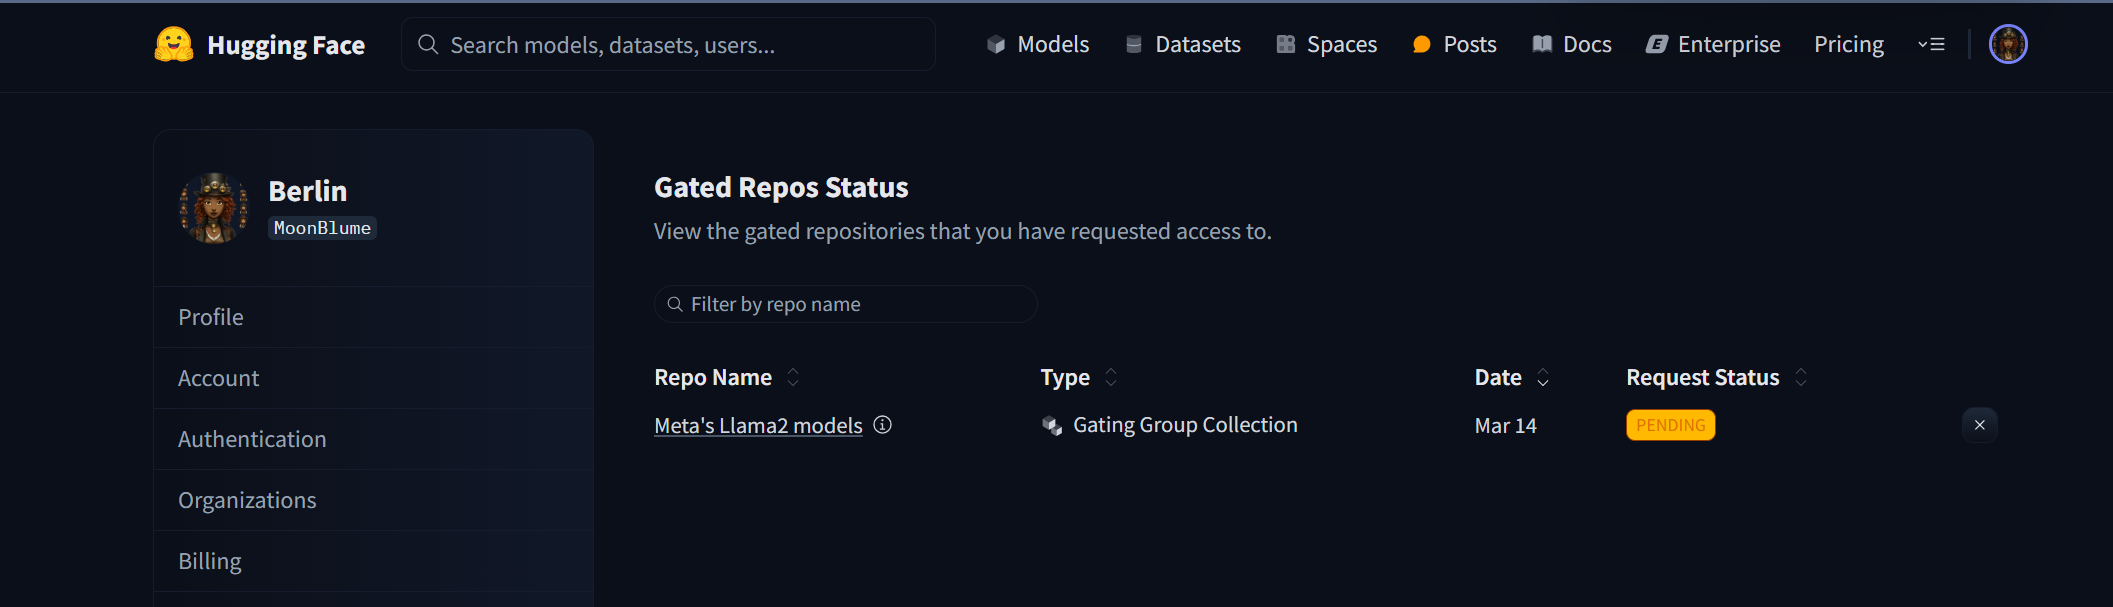


In [58]:
# Initialiser le modèle Hugging Face LLM
model_name = "meta-llama/Llama-2-7b-chat-hf"  # ou tout autre modèle compatible
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Initialiser le prédicteur LLM avec le modèle Hugging Face
llm_predictor = HuggingFaceLLM(model=model, tokenizer=tokenizer, temperature=0.7)

# Créer un ServiceContext en utilisant le prédicteur initialisé
service_context = ServiceContext.from_defaults(llm_predictor=llm_predictor)

print("Démarrage de l'indexation des documents...")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Llama-2-7b-chat-hf.
403 Client Error. (Request ID: Root=1-67d439d0-69b2a2132b53dcbe1887ca69;8ccfb5ec-c33f-4779-a8d9-66cbf8fdff65)

Cannot access gated repo for url https://huggingface.co/meta-llama/Llama-2-7b-chat-hf/resolve/main/config.json.
Access to model meta-llama/Llama-2-7b-chat-hf is restricted and you are not in the authorized list. Visit https://huggingface.co/meta-llama/Llama-2-7b-chat-hf to ask for access.

Approche Alternative en attendant l'approbation sur HuggingFace

In [ ]:
# Initialiser le modèle Hugging Face LLM
model_name = "HuggingFaceH4/zephyr-7b-beta"  # ou tout autre modèle compatible
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Initialiser le prédicteur LLM avec le modèle Hugging Face
llm_predictor = HuggingFaceLLM(model=model, tokenizer=tokenizer, temperature=0.7)

# Créer un ServiceContext en utilisant le prédicteur initialisé
service_context = ServiceContext.from_defaults(llm_predictor=llm_predictor)

print("Démarrage de l'indexation des documents...")

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

In [1]:
# Choose a local LLM and embedding model
llm = HuggingFaceLLM(
    model_name="google/flan-t5-large",
    tokenizer_name="google/flan-t5-large",
    context_window=2048,
    max_new_tokens=256,
    model_kwargs={"temperature": 0.1, "max_length": 512},
    generate_kwargs={},
    device_map="auto",
    model=AutoModelForSeq2SeqLM.from_pretrained(
        "google/flan-t5-large",
        device_map="auto",
    ),
    tokenizer=AutoTokenizer.from_pretrained("google/flan-t5-large")  # Load tokenizer separately
)

embed_model = HuggingFaceEmbedding(model_name="sentence-transformers/all-mpnet-base-v2", device="cpu")

# Configure settings
Settings.llm = llm
Settings.embed_model = embed_model

# Build the index
index = VectorStoreIndex.from_documents(documents)

# Save the index to disk
index.storage_context.persist(persist_dir="./storage")

# To load the index later:
# storage_context = StorageContext.from_defaults(persist_dir="./storage")
# loaded_index = load_index_from_storage(storage_context)

# Query the index
query_engine = index.as_query_engine()
response = query_engine.query("What is this document about?")
print(response)

NameError: name 'HuggingFaceLLM' is not defined